## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [2]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';')

In [3]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,00:45,2019-12-01T00:45:00+01:00,4750.0,1432.0,NaN,32.0,...,NaN,0.67,66.67,0.0,0.0,26.67,38.77,2.00,32.42,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:15,2019-12-01T01:15:00+01:00,4752.0,1450.0,NaN,33.0,...,NaN,0.69,68.75,0.0,0.0,26.62,38.71,2.13,34.47,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,03:00,2019-12-01T03:00:00+01:00,4407.0,1016.0,NaN,35.0,...,NaN,0.79,72.92,0.0,0.0,28.70,38.71,2.34,35.15,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,03:30,2019-12-01T03:30:00+01:00,4305.0,1040.0,NaN,33.0,...,NaN,0.77,68.75,0.0,0.0,29.08,38.31,2.46,36.18,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,03:45,2019-12-01T03:45:00+01:00,4236.0,1033.0,NaN,32.0,...,NaN,0.76,66.67,0.0,0.0,29.72,38.53,2.50,36.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,15:45,2020-01-26T15:45:00+01:00,5021.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5468,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,16:45,2020-01-26T16:45:00+01:00,5064.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5469,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,19:30,2020-01-26T19:30:00+01:00,5892.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5470,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,21:15,2020-01-26T21:15:00+01:00,5502.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S')
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,00:45:00,2019-12-01 00:45:00+01:00,4750.0,1432.0,NaN,32.0,...,NaN,0.67,66.67,0.0,0.0,26.67,38.77,2.00,32.42,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:15:00,2019-12-01 01:15:00+01:00,4752.0,1450.0,NaN,33.0,...,NaN,0.69,68.75,0.0,0.0,26.62,38.71,2.13,34.47,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,03:00:00,2019-12-01 03:00:00+01:00,4407.0,1016.0,NaN,35.0,...,NaN,0.79,72.92,0.0,0.0,28.70,38.71,2.34,35.15,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,03:30:00,2019-12-01 03:30:00+01:00,4305.0,1040.0,NaN,33.0,...,NaN,0.77,68.75,0.0,0.0,29.08,38.31,2.46,36.18,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,03:45:00,2019-12-01 03:45:00+01:00,4236.0,1033.0,NaN,32.0,...,NaN,0.76,66.67,0.0,0.0,29.72,38.53,2.50,36.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,15:45:00,2020-01-26 15:45:00+01:00,5021.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5468,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,16:45:00,2020-01-26 16:45:00+01:00,5064.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5469,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,19:30:00,2020-01-26 19:30:00+01:00,5892.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5470,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-01-26,21:15:00,2020-01-26 21:15:00+01:00,5502.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [6]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [7]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)

In [8]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

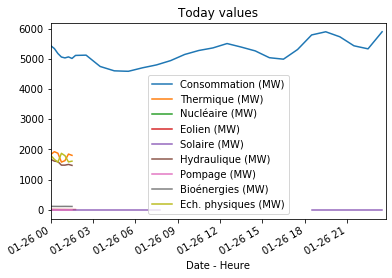

In [9]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")

In [10]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [11]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

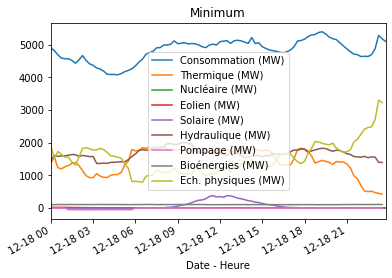

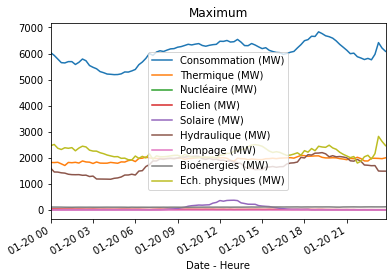

In [12]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [13]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5379.633888
Thermique (MW)         1129.621004
Nucléaire (MW)                 NaN
Eolien (MW)              13.028603
Solaire (MW)            104.533616
Hydraulique (MW)       1403.564312
Pompage (MW)             -4.483829
Bioénergies (MW)        107.798513
Ech. physiques (MW)    2619.303717
TCO Thermique (%)        20.663346
TCH Thermique (%)        34.461387
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.247168
TCH Eolien (%)           27.142751
TCO Solaire (%)           1.925848
TCH Solaire (%)           8.078307
TCO Hydraulique (%)      26.040913
TCH Hydraulique (%)      42.948775
TCO Bioénergies (%)       2.017086
TCH Bioénergies (%)      36.791362
Column 26                      NaN
dtype: float64

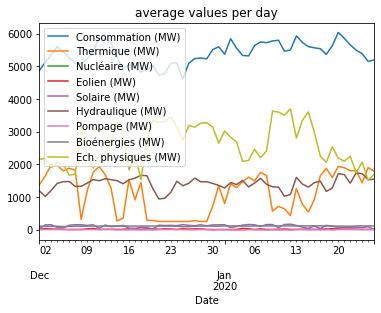

In [14]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

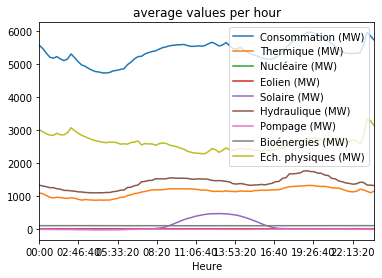

In [15]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

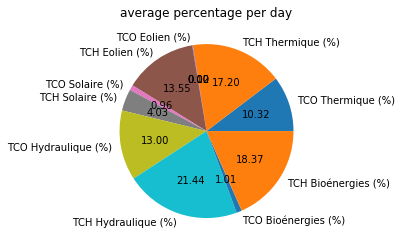

In [16]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')